# That One Team
*** 
<font color=red>Final Project: COVID-19 pandemic</font> <br>
<font color=darkred>Visualizing range and impact</font> 
***
_Members:_                   

Nick Bezinovich   nbezin2@uic.edu  www.github.com/nbezin2 <br>
Aaron Lau         alau8@uic.edu    www.github.com/AaronMLau <br>
Tony Makis        amakis2@uic.edu  www.github.com/TonyMakis <br>
Josh Peterson     jpeter62@uic.edu www.github.com/Jpeterson1352 <br>
Joshua Thomas     Jthoma90@uic.edu www.github.com/jthoma90
***
_Dataset sources:_
    
Sources
_Johns Hopkins Whiting School of Engineering Center for Systems Science and Engineering_ <br> https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data |
_New York Times_ <br> https://github.com/nytimes/covid-19-data                                                                   |


## Index


## Impact of COVID-19
_Source: Bing_
    
Below, you can see the current (as of compile time) impact of COVID-19 on Illinois. This issue is important and relevant, as this exploration will explore.

In [334]:
import IPython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import folium
# from folium.plugins import HeatMap
# from folium import plugins
%matplotlib inline

In [335]:
from IPython.display import IFrame, display, Latex, Markdown
IFrame('https://www.bing.com/covid/local/illinois_unitedstates', width = 900, height = 700)

## Abstract

The COVID-19 pandemic has affected our society in ways not seen in most people's lifetimes. Its impact is widespread and will continue to influence the ways we think about society in the years to come. As it continues to modify how we live day-to-day, many people are relying on Data Scientists to compile and abstract the data to better allow leaders and everyday citizens to make informed decisions and grasp the seriousness of what is going on.

Our group, ThatOneTeam, have seen much on the issue in the news and social media, and are using the platform of Data Science to better visualize and explain what we are seeing and hearing every day from our business, local, state, and national leaders. 

We hope that working with the data and providing clear, informative visualizations will allow others to quickly and easily determine what is going on now and what has happened in the past few months.

To achieve this, we are asking two primary questions: 

__What does the spread of the virus look like over time?__ 
_This question will allow us to infer what is going on today, and put into perspective terms such as “flattening the curve” repeated by our leaders._

__What does the spread of the virus look like in each country?__
_This will allow us to judge more accurately what the effect will be to us personally, as well as the world as a whole._

Using these questions as a focus, we then hope to model the future impact of COVID-19 using Machine Learning models to determine how many people will likely be affected by the disease and qualify where we are in the disease's reach.

Lastly, we hope to see how the “social distancing” methods are working, as well as portray the impact of not using social distancing would have on the spread of the virus.


## State of the Project

Our group has completely changed project and data, from previously exploring sales data, to now exploring the effect of COVID-19. See our updated slides submitted with this document.

#### Import statements

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string
import os

## Data Acquisition & Cleaning

The data we are using is very recent, with daily updates. It is already very clean as it is being used as a trusted source by many national and international agencies. Though we do not have much cleaning to do, it is important to keep this project updated. Therefore, there is a script to pull data from the Johns Hopkins datasets daily to allow our analysis to remain relevant.

### Acquisition

To keep this relevant, we have designed a script to fetch data daily from our source.

### Cleaning

As shown, this data is nearly what we want. There are a few fields we could remove, but overall this data is very clean and does not have any members that need to be estimated or removed.

In [24]:
global_data = pd.read_csv('time_series_covid19_confirmed_global_iso3_regions.csv')
global_deaths = pd.read_csv('time_series_covid19_deaths_global_iso3_regions.csv')
global_recovered = pd.read_csv('time_series_covid19_recovered_global_iso3_regions.csv')

In [4]:
global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349.0,367.0,423.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,361.0,377.0,383.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,1320.0,1423.0,1468.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,501.0,525.0,545.0,AND,150,Europe,39,Southern Europe,NaN,NaN


In [5]:
global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,11.0,14.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,21.0,22.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,152.0,173.0,193.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,22.0,AND,150,Europe,39,Southern Europe,NaN,NaN


In [6]:
global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,18.0,18.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,104.0,116.0,131.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,90.0,113.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,31.0,39.0,AND,150,Europe,39,Southern Europe,NaN,NaN


Below, we clean the data of excess columns to allow seaborn to plot our heatmap.

In [7]:
# Transform the data to allow plotting
Transformed_global_data = pd.DataFrame.copy(global_data,deep=True)
# entry codes: "Province/State","Country/Region","Lat","Long","Region Code","Sub-region Code","Intermediate Region Code","Intermediate Region Name"
# ["#adm1+name","#country+name","#geo-lat","#geo+lon","#region+main+code","#region+sub+code","#region+sub+name","#region+intermediate+code","#region+intermediate+name"]
Transformed_global_data = pd.DataFrame.drop(Transformed_global_data,columns=["Province/State","Country/Region","Lat","Long","Region Code","Region Code","Sub-region Code","Sub-region Name","Intermediate Region Code","Intermediate Region Name"],errors='raise')
Transformed_global_data = pd.DataFrame.drop(Transformed_global_data,index=0,errors='raise')
Transformed_global_data.head()
Transformed_global_headers = pd.DataFrame.copy(pd.DataFrame.drop(Transformed_global_data,columns=["1/22/20":"4/7/20",]), deep=True)

SyntaxError: invalid syntax (<ipython-input-7-62b06719b552>, line 8)

In [8]:
sns.set()

NameError: name 'Transformed_global_data' is not defined

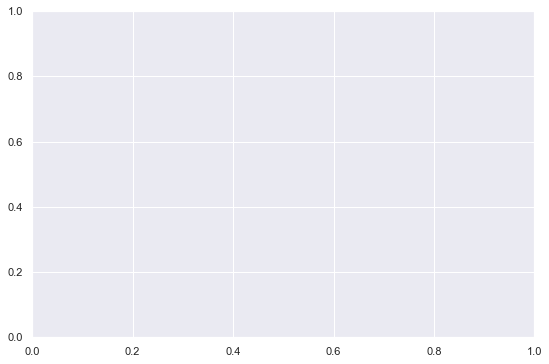

In [9]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data=Transformed_global_data, cmap=['white','yellow','red'], robust=True, annot=False, linewidths=.5, ax=ax)

In [10]:
df = global_deaths
df = df.drop(columns = ['Province/State',
                   'Country/Region',
                   'Lat',
                   'Long', 
                   'ISO 3166-1 Alpha 3-Codes', 
                   'Region Code', 
                   'Sub-region Code', 
                   'Sub-region Name', 
                   'Intermediate Region Code', 
                   'Intermediate Region Name'])
df = df.drop([0])
df = df.groupby(['Region Name'])
df = df.sum()
df = df.sum(axis = 1)
df = df.reset_index()
df = df.rename(columns = {0:'Deaths'})
df = df.sort_values(by='Deaths', ascending = False)
df

,Region Name,Deaths
3,Europe,542216.0
2,Asia,246433.0
1,Americas,89571.0
0,Africa,3967.0
4,Oceania,422.0


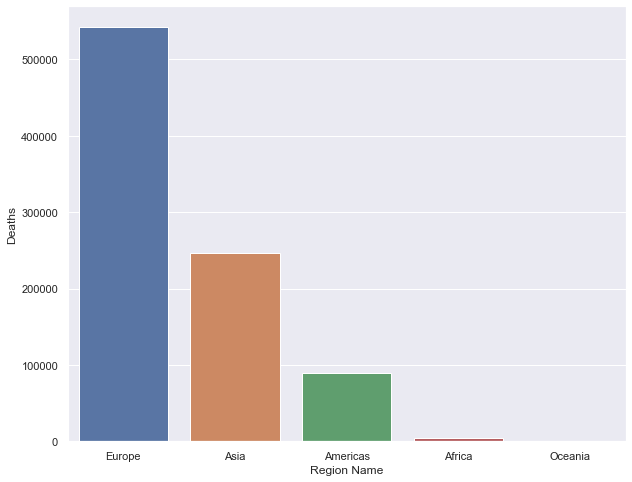

In [11]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Region Name', y = 'Deaths',ax=ax , data = df)

In [336]:
new_df = global_deaths
new_df = new_df.drop(columns = ['Province/State',
                                'Lat',
                                'Long',
                                'ISO 3166-1 Alpha 3-Codes',
                                'Region Code',
                                'Region Name',
                                'Sub-region Code',
                                'Sub-region Name',
                                'Intermediate Region Code',
                                'Intermediate Region Name'])
new_df = new_df.drop([0])
new_df = new_df.groupby('Country/Region')
new_df = new_df.sum()
new_df = new_df.sum(axis = 1)
new_df = new_df.reset_index()
new_df = new_df.rename(columns={0:'Deaths'})
new_df = new_df.sort_values(by='Deaths', ascending=False)
new_df.head()

,Country/Region,Deaths
84,Italy,223179.0
36,China,169091.0
156,Spain,137486.0
171,US,77499.0
61,France,72246.0


In [337]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x= 'Country/Region', y = 'Deaths',ax = ax, data = new_df.head(10))
for index, row in new_df.head(10):
    g.text(row.name, row.Deaths, row.tip,color='black',ha='center',h)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-337-2270e2c7255d>, line 5)

In [14]:
heat = global_data
heat = heat.drop([0])
m = folium.Map([41.8781, -87.6298], zoom_start=11)
# Ensure you're handing it floats
heat['Lat'] = heat['Lat'].astype(float)
heat['Long'] = heat['Long'].astype(float)
#heat_df = heat[heat['4/7/20']] # Reducing data size so it runs faster
#heat_df = heat[heat['Year']=='2007'] # Reducing data size so it runs faster

heat = heat[['Lat', 'Long']]
heat = heat.dropna(axis=0, subset=['Lat','Long'])

# List comprehension to make out list of lists
heat_data = [[row['Lat'],row['Long']] for index, row in heat.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m

In [16]:
conda install geopandas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\steva\Anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.8.3                |           py37_0         2.8 MB
    expat-2.2.5                |       he025d50_0          83 KB
    fiona-1.8.4                |   py37h22081e2_0         605 KB
    freexl-1.0.5               |       hfa6e2cd_0          50 KB
    gdal-2.3.3                 |   py37hdf43c64_0         984 KB
    geopandas-0.6.1       

In [313]:
import geopandas as gpd
import pycountry as pc

In [315]:
shapefile = './ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp'
map_df = gpd.read_file(shapefile)
map_df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,ZWE,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."
5,Admin-0 country,6,6,Vatican,VAT,0,2,Sovereign country,Vatican,VAT,...,바티칸 시국,Vaticaanstad,Watykan,Vaticano,Ватикан,Vatikanstaten,Vatikan,Thành Vatican,梵蒂冈,"POLYGON ((12.43916 41.89839, 12.43057 41.89756..."
6,Admin-0 country,1,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,...,바누아투,Vanuatu,Vanuatu,Vanuatu,Вануату,Vanuatu,Vanuatu,Vanuatu,萬那杜,"MULTIPOLYGON (((166.74580 -14.82686, 166.81016..."
7,Admin-0 country,1,3,Uzbekistan,UZB,0,2,Sovereign country,Uzbekistan,UZB,...,우즈베키스탄,Oezbekistan,Uzbekistan,Usbequistão,Узбекистан,Uzbekistan,Özbekistan,Uzbekistan,乌兹别克斯坦,"MULTIPOLYGON (((70.94678 42.24868, 70.97900 42..."
8,Admin-0 country,1,4,Uruguay,URY,0,2,Sovereign country,Uruguay,URY,...,우루과이,Uruguay,Urugwaj,Uruguai,Уругвай,Uruguay,Uruguay,Uruguay,乌拉圭,"POLYGON ((-53.37061 -33.74219, -53.41958 -33.7..."
9,Admin-0 country,3,6,Federated States of Micronesia,FSM,0,2,Sovereign country,Federated States of Micronesia,FSM,...,미크로네시아 연방,Micronesia,Mikronezja,Micronésia,Микронезия,Mikronesiens federerade stater,Mikronezya,Micronesia,密克罗尼西亚联邦,"MULTIPOLYGON (((162.98320 5.32573, 162.99346 5..."


In [327]:
# This fetches all the Country codes, and ensures they line up with iso3661 standards
# make sure you rerun the imports!!! @pycountry lib needed
countries=[] 
for cur in map_df['ADM0_A3']:
    country = pycountry.countries.get(alpha_3=cur)
    if country is not None:
        countries.append(country.alpha_3.encode("ascii"))
    else:
        countries.append(country)
        
#Uncomment either next line for inserting into map_df, or next next line for deleting it and rerunning
#------------------------------------------------------------------------------------------------------
# map_df.insert(loc=0, column='3LetterCodes', value=countries)
#del(map_df['3LetterCodes'])
map_df.head()

,3LetterCodes,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,ZWE,Admin-0 country,1,3,Zimbabwe,ZWE,0,2,Sovereign country,Zimbabwe,...,짐바브웨,Zimbabwe,Zimbabwe,Zimbábue,Зимбабве,Zimbabwe,Zimbabve,Zimbabwe,辛巴威,"POLYGON ((31.28789 -22.40205, 31.19727 -22.344..."
1,ZMB,Admin-0 country,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.39609 -15.64307, 30.25068 -15.643..."
2,YEM,Admin-0 country,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"MULTIPOLYGON (((53.08564 16.64839, 52.58145 16..."
3,VNM,Admin-0 country,3,2,Vietnam,VNM,0,2,Sovereign country,Vietnam,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"MULTIPOLYGON (((104.06396 10.39082, 104.08301 ..."
4,VEN,Admin-0 country,5,3,Venezuela,VEN,0,2,Sovereign country,Venezuela,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"MULTIPOLYGON (((-60.82119 9.13838, -60.94141 9..."


In [329]:
df = global_data
df = df[['ISO 3166-1 Alpha 3-Codes','4/7/20']]
df = df.drop([0])
data_for_map = df.rename(index=str, columns={'4/7/20': 'Total Count'})
data_for_map['Total Count'] = data_for_map['Total Count'].fillna(0)
data_for_map.head()

,ISO 3166-1 Alpha 3-Codes,Total Count
1,AFG,423.0
2,ALB,383.0
3,DZA,1468.0
4,AND,545.0
5,AGO,17.0


In [330]:
#merged = map_df.set_index('CNTRY_NAME').join(data_for_map.set_index('Country/Region'))
merged = map_df.set_index('3LetterCodes').join(data_for_map.set_index('ISO 3166-1 Alpha 3-Codes'))
merged['Total Count'] = merged['Total Count'].fillna(0)
newMerged = merged[['Total Count', "geometry"]].copy()
newMerged.head()

,Total Count,geometry
ABW,74.0,"POLYGON ((-69.89912 12.45200, -69.89570 12.423..."
AFG,423.0,"POLYGON ((66.52227 37.34849, 66.82773 37.37129..."
AGO,17.0,"MULTIPOLYGON (((13.07275 -4.63477, 13.05732 -4..."
AIA,3.0,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
ALB,383.0,"POLYGON ((19.34238 41.86909, 19.34551 41.91885..."


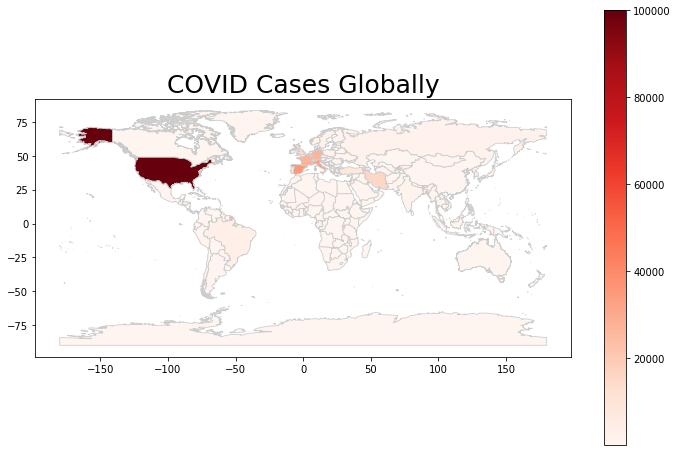

In [331]:
newMerged = newMerged.set_geometry('geometry')
variable = 'Total Count'
# vmin, vmax = 1, 100000
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 8))
newMerged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.set_title('COVID Cases Globally', fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)